In [ ]:
!pip install -U "tensorflow-text==2.13.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-

In [ ]:
pip install transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fss

In [ ]:
#!pip install --quiet tensorflow_text

import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


stopwords.words('english')

exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

#exclude = "!.,?"
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))


In [ ]:
df = pd.read_csv('/content/Classified_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,title,parsed_content,date,time,sentiment_label_bert,Sentiment_score
0,0,Hay más de 1.300 dominios de primer nivel (ade...,Me encontré un enlace oficial y actualizado ...,2024-12-02,13:18:03,NEGATIVE,0.986808
1,1,"Luxury brands are betting big on India, and so...",As luxury brands increase their sales in Indi...,2024-11-28,03:42:20,NEGATIVE,0.991765
2,2,Cloudflare 2024 Year in Review,Subscribe to receive notifications of new pos...,2024-12-09,14:00:00,POSITIVE,0.604218
3,3,Cloudflare 2024 Year in Review,Subscribe to receive notifications of new pos...,2024-12-09,14:00:00,POSITIVE,0.604218
4,4,India's Bharti Airtel signs 'multi-billion' do...,We are experiencing some temporary issues. Th...,2024-12-04,08:26:10,NEGATIVE,0.981161


In [ ]:
df['title'] = df['title'].str.lower()

df['title'] = df['title'].apply(remove_html_tags)

df['title'] = df['title'].apply(remove_url)

df['title'] = df['title'].apply(remove_punc)



In [ ]:

from sklearn.preprocessing import LabelEncoder

X = df['title']
Y = df['sentiment_label_bert']
#print(X)
#print(Y)

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

#print(Y)

X_train,X_test,y_train,y_test = train_test_split(df['title'],Y,test_size=0.2,random_state=42)
print(X_train)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

67     sc restores exim bank of china others as finan...
26     will satellite broadband services truly be a g...
22     spam calls telcos dial doca to quickly notify ...
31     use dips to buy into reliance bajaj finserv an...
56     esports strategic intelligence report 2024 glo...
                             ...                        
71     trai move on intl smses unlikely to help relia...
14     no ‘first come first serve’ in satcom spectrum...
92     indias 6g technology ambitions run into fundin...
51     bharti airtel signs multibillion dollar 4g 5g ...
102    black friday sale special discounts for bank o...
Name: title, Length: 85, dtype: object
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4",trainable=True)


text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
#print (text_input)
encoder_inputs = preprocessor(text_input)
#print(encoder_inputs)
outputs = encoder(encoder_inputs)
#print(outputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
#print(pooled_output)

# drop_out = tf.keras.layers.Dropout(0.2,name='dropout')(pooled_output)
output = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(drop_out)

model=tf.keras.Model(inputs=[text_input],outputs=[output])

In [ ]:
# Compile the mode
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
3/3 [==============================] - 187s 44s/step - loss: 0.7985 - accuracy: 0.5526 - val_loss: 2.3483 - val_accuracy: 0.6667
Epoch 2/5
3/3 [==============================] - 129s 39s/step - loss: 1.5261 - accuracy: 0.5263 - val_loss: 0.6699 - val_accuracy: 0.6667
Epoch 3/5
3/3 [==============================] - 128s 38s/step - loss: 0.6805 - accuracy: 0.6053 - val_loss: 1.0762 - val_accuracy: 0.6667
Epoch 4/5
3/3 [==============================] - 126s 37s/step - loss: 0.8433 - accuracy: 0.6711 - val_loss: 0.6598 - val_accuracy: 0.6667
Epoch 5/5
3/3 [==============================] - 126s 38s/step - loss: 0.7196 - accuracy: 0.5658 - val_loss: 0.6521 - val_accuracy: 0.6667


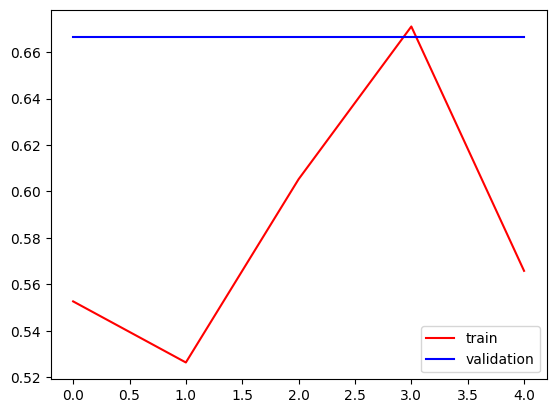

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")


Final Training Accuracy: 0.5657894611358643
Final Validation Accuracy: 0.6666666865348816
